# What is Modem?

I bet that you've heard the word modem before.  Isn't it that box that gives me internet access? But do you know what it is?  A modem is shorthand for *modulator-demodulation*.

Modulation is all about transmitting information through a medium, or *channel*, in some specific way.  Information is
conveyed by modifying a template signal in a prescribed way that is understood by a receiver.  Here's our template signal:

\begin{equation}
    x(t) = A (t) \cos \left(\omega (t) t + \phi (t) \right). 
\end{equation}

Information is injected into this template by varying the amplitude $A(t)$, angular frequency $\omega (t)$, and or phase $\phi(t)$.  In this post, we will introduce a family of modulation techniques centered on varying the phase, called *Phase Shift Keying* (PSK).


## PSK Modulation

The standard derivation of PSK modulation follows from standard trigonometric identities:  

\begin{align}
    x_{p}(t) &= \cos (2\pi f_{c} t + \phi(t)) \\
             &= \cos (\phi(t)) \cos (2\pi f_{c} t) - \sin (\phi(t)) \sin (2\pi f_{c} t) \\
             &= I(t) \cos (2\pi f_{c} t) - Q(t) \sin (2\pi f_{c} t) 
\end{align}

The $I(t)= \cos (\phi(t))$ and $Q(t)=\sin (\phi(t))$ are the inphase and quadrature waveforms.  If you take a step back, you can see an interesting phenomena: phase modulation has been converted to amplitude modulation.

It turns out to be very convenient to represent this last expression in terms of complex waveforms:

\begin{align}
    x_{c} (t) = \operatorname{Re} (z_{b} (t) \exp(2\pi i f_{c} t)) 
\end{align}

where $z_{b} (t)$ is the complex baseband waveform

\begin{equation}
    z_{b} (t) = I(t) + i Q(t)=\exp(i\phi(t)).
\end{equation}

The complex formulation is great because it seperates the baseband waveform, $z_{b}$, from the potentially much higher frequency carrier.  

## PSK Demodulation


### Bits and Symbols

The most fundamental unit of information is digital communication is the bit.  Different modulation schemes package up groups of bits into larger pieces of data called symbols.  Below are constellation diagrams for two very common and effective PSK schemes: BPSK and QPSK.  Constellation diagrams provide a compact way of describing the correspondance between bits, symbols, phases, and amplitude levels.    

![title](images/constellation.png)

The QPSK constellation is a little more interesting so I'll work on describing it in a little more detail.  Let's provide some context.  Suppose you want to transmit the bit sequence 

\begin{equation}
    b = \left[ 0,1,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,0\right]
\end{equation}

through some unspecified channel.  In QPSK, each symbol is made from two consecutive bits.  Our bit sequence is therefore transformed into the following sequence of symbols:

\begin{equation}
    s = \left[ 01, 10, 10, 01, 01, 00, 11, 10, 10 \right].
\end{equation}

So far so good.  Now we need to consult the constellation diagram.  If we want to transmit the symbol $01$, then we should choose 

\begin{equation}
    \phi(t) = \frac{3\pi}{4}, \quad 0\le t \le T
\end{equation}

which means that the baseband waveform for this time segment should be

\begin{equation}
    z_{b} (t) = I(t) + i Q(t) 
              = \cos(\phi(t)) + \sin(\phi(t)) 
              = -\frac{\sqrt{2}}{2} + i\frac{\sqrt{2}}{2}.
\end{equation}

The time variable $T$ represents the duration of each symbol.  Its reciprocal is commonly called the symbol rate, or baud rate.

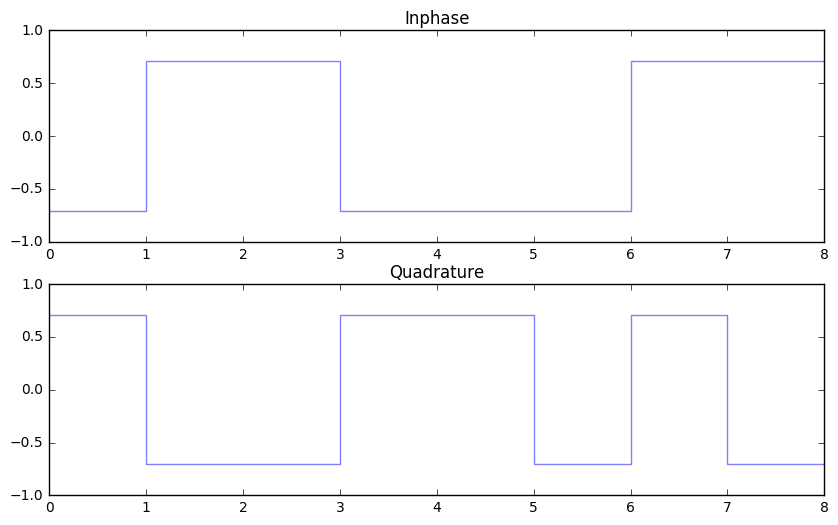

In [89]:
import matplotlib.pyplot as plt
import numpy as np 

pi = np.pi
phi = pi*np.array([3.0/4.0, 7.0/4.0, 7.0/4.0, 3.0/4.0, 3.0/4.0, 5.0/4.0, 1.0/4.0, 7.0/4.0, 7.0/4.0])
x = [0,1,2,3,4,5,6,7,8]
z = np.exp(1j*phi)

plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.step(x, np.real(z), where='post', linestyle='-', alpha=0.5,)
plt.ylim([-1,1])
plt.title('Inphase')

plt.subplot(212)
plt.step(x, np.imag(z), where='post', linestyle='-', alpha=0.5,)
plt.ylim([-1,1])
plt.title('Quadrature')
plt.show()


The first order of business

In [35]:
import collections as coll
import bitstring
class Symbolizer(object):
    def __init__(self,bits_per_symbol=1):
        self.bits_per_symbol = bits_per_symbol
        self.state = coll.deque([0] * bits_per_symbol)
        self.cnt = 0
    def step(self,bit):
        head = self.state.popleft()
        self.state.append(bit)
        self.cnt = (self.cnt + 1) % self.bits_per_symbol
        if self.cnt == 0:
            out = self.state.copy()
        else:
            out = None        
        return out
        

ImportError: No module named 'bitstring'

In [37]:
def symbol_map(bits):
    foo = Symbolizer(2)
    output = []
    for bi in bits:
        y = foo.step(bi)
        if y != None:
            temp = list(y)
            
            output += [temp]
    return output

symbol_map([1,0,1,0,0,0,1,1,0,0])


TypeError: sequence item 0: expected str instance, int found

```rust
use std::collections::VecDeque;
```

```rust
struct Symbolizer {
    bits_per_symbol:u8,
    cnt:u8,
    state: VecDeque<u8>,
}


impl Symbolizer {
    fn init_state(len:u8) -> VecDeque<u8> {
        let mut state: VecDeque<u8> = VecDeque::new();
        for i in 0..len {
            state.push_back(0);
        }
        state
    }
    
    fn new(bits_per_symbol:u8) -> Symbolizer {
        Symbolizer {
            bits_per_symbol: bits_per_symbol,
            cnt: 0,
            state: Symbolizer::init_state(bits_per_symbol)
        }
    }
    
    fn step(&mut self, bit: u8) -> Option<VecDeque<u8>> {
        self.state.push_back(bit);
        let head = self.state.pop_front();
        self.cnt = (self.cnt + 1) % self.bits_per_symbol;
        out = if (self.cnt == 0) {Some (self.state.clone()) } else {None};
        out
    }
}
```

In [28]:
foo = Symbolizer(2)
x = foo.step(1)
y = foo.step(0)
z = foo.step(0)
w = foo.step(0)
print(x)
print(y)
print(z)
print(w)

None
deque([1, 0])
None
deque([0, 0])


Before we discuss the algorithmic details of differential encoding/decoding, it's important to motivate the reason for why it might be considered.

### Motivation

### The Algorithm
At the bit-level, the algorithm is extremely simple.  Given a sequence of input bits, ${ x_{i} }$ the differentially encoded stream of bits is defined by the following recurrence relation:

\begin{equation}
    y_{i} = y_{i-1} \oplus x_{i}
\end{equation}

The differential decoder runs in the receiver and recovers the original sequence from the encoded sequence as follows:

\begin{equation}
    z_{i} = y_{i-1} \oplus y_{i}
\end{equation}

So, why does this work?  Let's prove to ourselves that differentially decoding a differentially encoded bit sequence returns
the original sequence.  For each $i$,

\begin{align}
    z_{i} &= y_{i-1} \oplus y_{i} \\
          &= y_{i-1} \oplus \left( y_{i-1} \oplus x_{i} \right) \\
          &= x_{i} \oplus \left( y_{i-1} \oplus y_{i-1} \right) \\
          &= x_{i} \oplus 0 \\
          &= x_{i}
\end{align}

Of course a real communications channel will cause some of the $y_{i}$ bits to flip.  To see the channel's impact, let

\begin{equation}
    \bar{y}_{i} = y_{i} \oplus 1.
\end{equation}

and take a look at what happens when two consecutive bit errors occur:

\begin{align}
    z_{i} &= \bar{y}_{i-1} \oplus \bar{y}_{i} \\
          &= \left( y_{i-1} \oplus 1 \right) \oplus \left( y_{i} \oplus 1 \right) \\
          &= \left( y_{i-1} \oplus y_{i} \right) \oplus \left( 1 \oplus 1 \right) \\
          &= x_{i} \oplus 0 \\
          &= x_{i}. 
\end{align}

In other words, the differential decoder fixes two consecutive bit errors.





### Design Patterns
There are a variety of ways to implement a differential encoder/decoder.  I'm really after designing my algorithms in efficient and elegant ways.  One thing I want to try to avoid is being tied to a particular type of input.  I don't want to implement separate differential encoders when the bits are coming in one at a time and when they are given to me all at once.  I want to capture the *essence* of the algorithm in a flexible and reusable module.  And if I can do this using functional programming techniques, then that's just icing on the cake.  


The first thing I need is some way to maintain state during the course of the algorithm.  Here's one option.

In [4]:
class Register(object):
    def __init__(self,val=None):
        self.val = val
    def push(self, new_value):
        self.val = new_value
    def peek(self):
        return self.val

Okay, now let's try to capture the essence of a differential encoder.  We are going to use a concept from functional programming called *currying* to do it.  All this really means is taking advantage of the mathematical fact that a function of two arguments can be interpreted as a function of one argument that returns another function of one argument.  What does currying look like in Python? Let's look at a simple example before getting to the differential encoder.  Consider a simple `adder` function that takes two numbers and adds them together:

In [22]:
def adder(x,y):
    return x + y

Here's the curried version of this function.  

In [23]:
def adder_c(x):
    def inner(y):
        return x + y
    return inner

In [16]:
def diff_enc():
    state = Register(0)
    def step(bit, signal=None):
        if signal == 1:
            state.push(0)
            return bit
        curr   = state.peek()
        output = curr ^ bit
        state.push(output)
        return output
    
    return step

In [17]:
def diff_dec():
    state = Register(0)
    def step(bit, signal=None):
        if signal == 1:
            state.push(0)
            return bit
        curr   = state.peek()
        output = curr ^ bit
        state.push(bit)
        return output
    return step

In [18]:
enc = diff_enc()
dec = diff_dec()

In [19]:
bits_in = list(map(enc,[0,1,1,0,0,1,1,0]))

In [20]:
bits_out = list(map(dec,bits_in))
bits_out

[0, 1, 1, 0, 0, 1, 1, 0]

In [21]:
foo()

NameError: name 'foo' is not defined

In [62]:
list(map(foo,[1,1,0,1,0,1,1,0,1,0,0]))

[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]

```rust
fn diff_enc() -> Box<FnMut(i8) -> i8> {
    let mut reg: i8 = 0;
    Box :: new (move |x:i8| {
        reg ^= x;
        reg
    }
}
```

```c++
auto diff_encode = [] () {
    auto reg = std::make_shared<int>(0);
    auto step = [reg](int bit,int flip) {
        int out = *reg ^ bit;
        *reg = out ^ flip;
        return out;
    };
    return step;
};
```

```c++
enum class Bit: uint8_t { L = 0, H = 1 };
```

\begin{cases} 
      0 & x\leq 0 \\
      \frac{100-x}{100} & 0\leq x\leq 100 \\
      0 & 100\leq x 
\end{cases}
